# Signal around ZEB instances

Look at ZEB motifs that are present in peaks common to fibroblasts and iPSCs. Looks at pileup around them. 

Based on `20210321_ZEB_vPlot/Signal.ipynb`.

**Inputs:**
1. A BED file with ZEB instances present in peaks in both fibroblasts and iPSCs.
2. Insertion bigwigs for the two samples.

In [41]:
library(rtracklayer)
library(GenomicRanges)
library(ggplot2)
library(patchwork)

## Load Input Data

In [2]:
# TODO: prepare this BED file in a more reproducible manner 
zeb_fibr_ipsc_hits = read.table("../../analysis/20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/ZEB.cluster_idx5.and.cluster_idx16.bed")[,1:3]
colnames(zeb_fibr_ipsc_hits) = c("chr", "start", "end")
zeb_fibr_ipsc_hits = GRanges(zeb_fibr_ipsc_hits)

zeb_fibr_ipsc_hits

GRanges object with 4460 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1       858753-858759      *
     [2]     chr1     1013591-1013597      *
     [3]     chr1     1059779-1059785      *
     [4]     chr1     1064398-1064404      *
     [5]     chr1     1471164-1471170      *
     ...      ...                 ...    ...
  [4456]     chrX 154490590-154490596      *
  [4457]     chrX 155094683-155094689      *
  [4458]     chrX 155216545-155216551      *
  [4459]     chrX 155612788-155612794      *
  [4460]     chrX 155881445-155881451      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [3]:
# TODO: prepare file in more reproducible manner
# Can use this for control
ap1_hits = read.table("../../analysis/20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/FOS_MA0476.1.cluster_idx5.bed")[,1:3]
colnames(ap1_hits) = c("chr", "start", "end")
ap1_hits = GRanges(ap1_hits)

ap1_hits

GRanges object with 7266 ranges and 0 metadata columns:
         seqnames            ranges strand
            <Rle>         <IRanges>  <Rle>
     [1]     chr1     944861-944869      *
     [2]     chr1   5938815-5938823      *
     [3]     chr1   5983654-5983662      *
     [4]     chr1   6603045-6603053      *
     [5]     chr1   6800952-6800960      *
     ...      ...               ...    ...
  [7262]     chrY 12552730-12552738      *
  [7263]     chrY 12710390-12710398      *
  [7264]     chrY 14798174-14798182      *
  [7265]     chrY 14802323-14802331      *
  [7266]     chrY 18858743-18858751      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

## Process

In [4]:
get_matrix_from_bigwig <- function(bigwig_path, peak_set) {
    # ensure peak set has fixed width
    stopifnot(length(unique(width(peak_set)))==1)
    
    as.matrix(import(bigwig_path, 
      which=peak_set, as="NumericList"))
}

In [11]:
zeb_insertions_fibr = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 501, fix = "center"))

In [12]:
zeb_insertions_ipsc = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx16.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 501, fix = "center"))

In [7]:
# ap1_insertions = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
#                                     resize(ap1_hits, width = 500, fix = "center"))

In [8]:
# tead_insertions = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
#                                     resize(tead_hits, width = 500, fix = "center"))

## Plotting

[1] 250

In [67]:
make_pileup <- function(m, title, ylabel=F) {
    to_plot = colMeans(m)
    to_plot = to_plot/max(to_plot)
    
    p <- ggplot(data.frame(x=seq(-floor(ncol(m)/2), 
                           floor(ncol(m)/2)), 
                  y=to_plot)) +
    geom_line(aes(x=x,y=y)) +
    ggtitle(title) +
    xlab("Position Relative to Motif") +
    ylab("Normalized Insertions") + 
    theme_bw(base_size=26) +
    theme(plot.title = element_text(hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())
    
    if (ylabel==F) {
        p = p + theme(axis.title.y=element_blank())
    }
    
    p
}

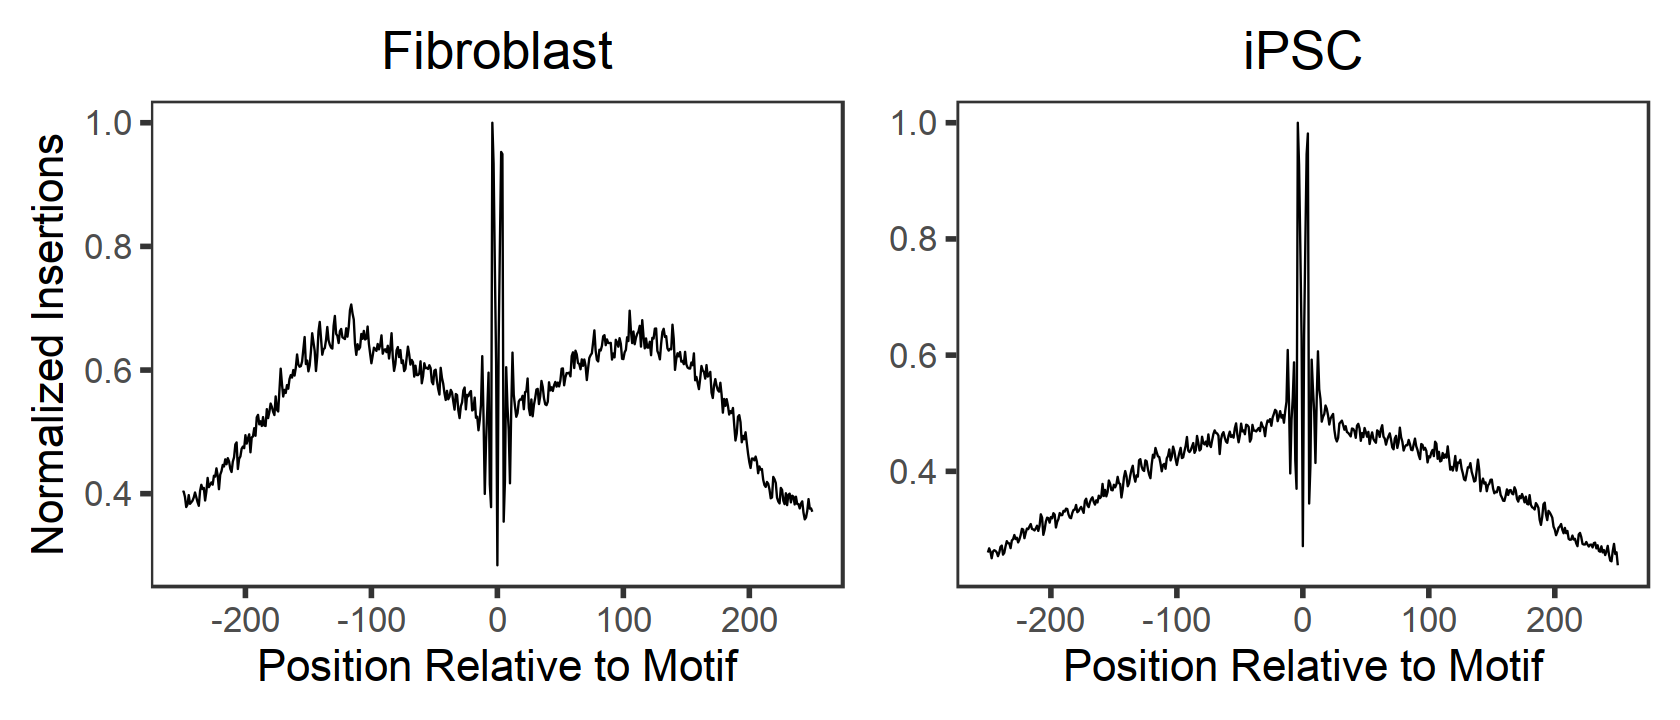

In [68]:
options(repr.plot.width = 14, repr.plot.height = 6)

make_pileup(zeb_insertions_fibr, "Fibroblast", ylabel=T) | make_pileup(zeb_insertions_ipsc, "iPSC", ylabel=F)